In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Preprocessing

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
Id,0
Prediction,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,0
DER_mass_jet_jet,0
DER_prodeta_jet_jet,0
DER_deltar_tau_lep,0


In [9]:
df.drop(columns=['Id'],inplace=True)

In [10]:
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [11]:
X = df.drop(columns=['Prediction'])
y = df['Prediction']

In [12]:
y.value_counts()

,count
Prediction,
b,164333
s,85667


we can see the class unbalance !!

In [13]:
X.value_counts()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  DER_met_phi_centrality  DER_lep_eta_centrality  PRI_tau_pt  PRI_tau_eta  PRI_tau_phi  PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  PRI_met  PRI_met_phi  PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt
 1192.026     97.016                       959.601       42.294    -999.000              -999.000          -999.000             3.919               6.585       567.689     0.893                  1.414                  -999.000                281.085     -0.690       -1.044       250.885      1.705        2.059       12.307   -0.064       412.373        1             35.719             -1.057                2.600               -999.000               -999.000                -999.000                35.719            1
-999.000      11.960                       215.735       35.060    -999.000              -999.000          -999.000             2.937               35.060      211.748     0.525                 -0.016                  -999.000                138.862     -1.217       -0.025       72.886      -2.031       -2.848       75.339   -3.009       264.066        0            -999.000            -999.000             -999.000             -999.000               -999.000                -999.000                0.000             1
              11.998                       97.705        580.134   -999.000              -999.000          -999.000             0.435               2.379       1028.251    1.033                  0.104                  -999.000                219.272     -0.565       -2.897       226.543     -0.130       -2.886       134.609  -2.818       1100.861       1             582.435            -0.261                0.266               -999.000               -999.000                -999.000                582.435           1
              13.178                       747.370       129.832   -999.000              -999.000          -999.000             3.673               31.277      606.686     0.380                  1.217                  -999.000                347.655      0.493        2.409       132.098     -1.824       -1.025       138.439  -1.122       694.822        1             126.933            -1.693                0.282               -999.000               -999.000                -999.000                126.933           1
              17.303                       30.090        469.589    1.743                 434.888           2.404               0.433               43.518      712.293     0.589                  0.209                   0.001                  89.760      -0.890        1.410       52.862      -0.458        1.444       327.588   1.312       693.494        3             414.963             0.907               -2.063                88.072                 2.650                  -0.909                  569.672           1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ..
              33.487                       53.923        177.373    0.873                 133.879          -0.021               1.690               66.232      293.280     1.073                  0.476                   0.000                  31.956       0.714       -2.843       34.279       1.688       -1.461       149.617  -0.989       317.885        3  

-999.0 is actually missing values so let's deal with  those first

In [14]:
import numpy as np
import pandas as pd

X.replace(-999.0, np.nan, inplace=True)

In [15]:
len(df['DER_mass_MMC']),len(df['DER_mass_transverse_met_lep'])

(250000, 250000)

In [16]:
for col in X.columns:
    if X[col].isnull().sum() > 0:
        print(f"Column '{col}' has {round((X[col].isnull().sum()/250000)*100)}% missing values.")
    else:
        print(f"Column '{col}' has no missing values.")

Column 'DER_mass_MMC' has 15% missing values.
Column 'DER_mass_transverse_met_lep' has no missing values.
Column 'DER_mass_vis' has no missing values.
Column 'DER_pt_h' has no missing values.
Column 'DER_deltaeta_jet_jet' has 71% missing values.
Column 'DER_mass_jet_jet' has 71% missing values.
Column 'DER_prodeta_jet_jet' has 71% missing values.
Column 'DER_deltar_tau_lep' has no missing values.
Column 'DER_pt_tot' has no missing values.
Column 'DER_sum_pt' has no missing values.
Column 'DER_pt_ratio_lep_tau' has no missing values.
Column 'DER_met_phi_centrality' has no missing values.
Column 'DER_lep_eta_centrality' has 71% missing values.
Column 'PRI_tau_pt' has no missing values.
Column 'PRI_tau_eta' has no missing values.
Column 'PRI_tau_phi' has no missing values.
Column 'PRI_lep_pt' has no missing values.
Column 'PRI_lep_eta' has no missing values.
Column 'PRI_lep_phi' has no missing values.
Column 'PRI_met' has no missing values.
Column 'PRI_met_phi' has no missing values.
Colu

Features with missing > 40% has to be dropped.

---



DER_deltaeta_jet_jet,

DER_mass_jet_jet,

DER_prodeta_jet_jet,

DER_lep_eta_centrality,

PRI_jet_subleading_pt,

PRI_jet_subleading_eta,

PRI_jet_subleading_phi

'PRI_jet_leading_phi',
                
'PRI_jet_leading_eta',
                
'PRI_jet_leading_pt'

In [17]:
X.drop(columns=['DER_deltaeta_jet_jet',
'DER_mass_jet_jet',
'DER_prodeta_jet_jet',
'DER_lep_eta_centrality',
'PRI_jet_subleading_pt',
'PRI_jet_subleading_eta',
'PRI_jet_subleading_phi'],inplace=True)

In [18]:
X.drop(columns=['PRI_jet_leading_phi',
                'PRI_jet_leading_eta',
                'PRI_jet_leading_pt'],inplace=True)


In [19]:
X.isnull().sum()

,0
DER_mass_MMC,38114
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltar_tau_lep,0
DER_pt_tot,0
DER_sum_pt,0
DER_pt_ratio_lep_tau,0
DER_met_phi_centrality,0
PRI_tau_pt,0


Imputing with median

In [20]:
# Median imputation
X['DER_mass_MMC'] = X['DER_mass_MMC'].fillna(X['DER_mass_MMC'].median())
X['PRI_jet_all_pt'] = X['PRI_jet_all_pt'].fillna(X['PRI_jet_all_pt'].median())

In [21]:
X.isnull().sum()

,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltar_tau_lep,0
DER_pt_tot,0
DER_sum_pt,0
DER_pt_ratio_lep_tau,0
DER_met_phi_centrality,0
PRI_tau_pt,0


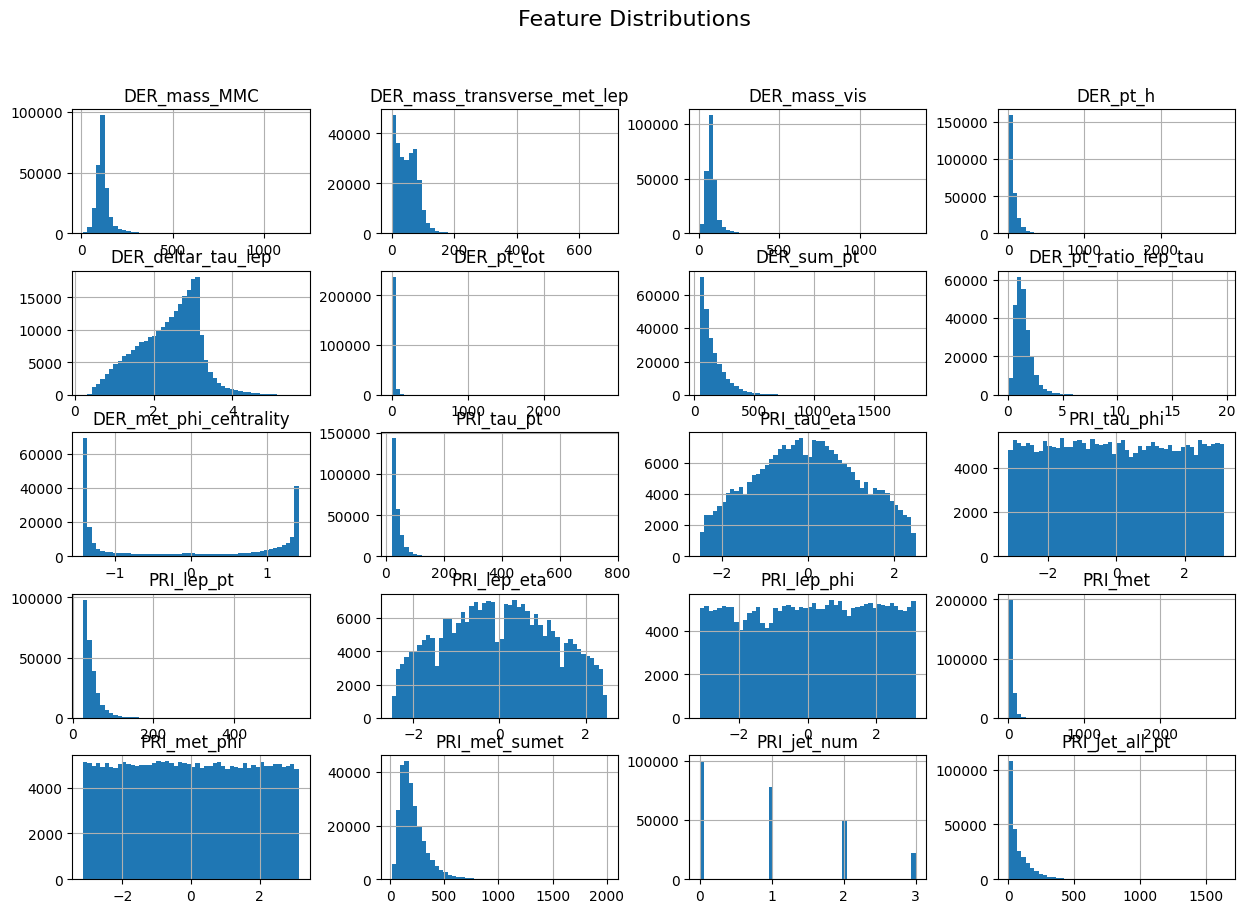

In [22]:
import matplotlib.pyplot as plt

X.hist(figsize=(15, 10), bins=50)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [23]:
y = df['Prediction']

Encoding

In [24]:
label_map = {'b': 0, 's': 1}
y = df['Prediction'].map(label_map)

In [25]:
display(y.head())

,Prediction
0,1
1,0
2,0
3,0
4,0


Let's Normalise !

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Let's first do ensembling techniques (Bagging)


In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y , random_state=42)

In [76]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred = model.predict(X_test)

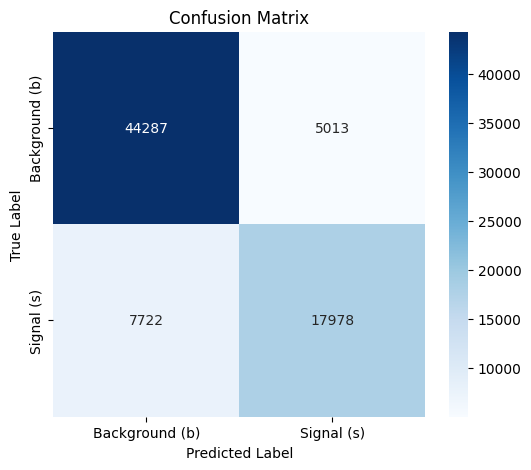

Classification Report:

                precision    recall  f1-score   support

Background (b)       0.85      0.90      0.87     49300
    Signal (s)       0.78      0.70      0.74     25700

      accuracy                           0.83     75000
     macro avg       0.82      0.80      0.81     75000
  weighted avg       0.83      0.83      0.83     75000



In [79]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Background (b)', 'Signal (s)']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

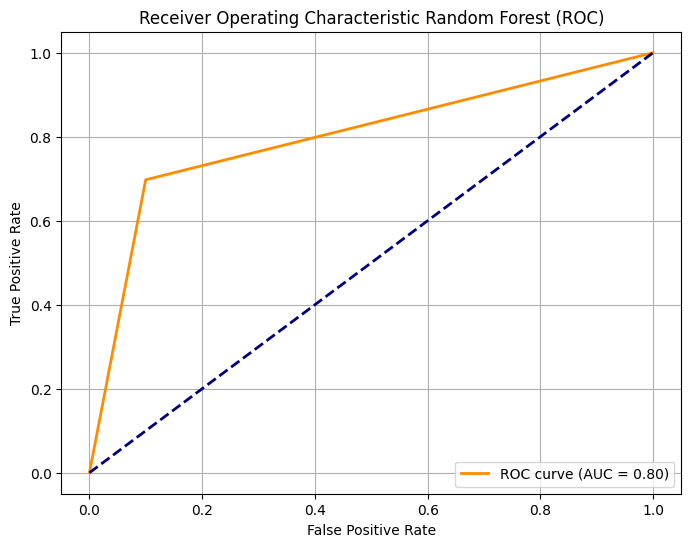

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Random Forest (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# XGBoost !

In [70]:
model_xg = GradientBoostingClassifier()
model_xg = model_xg.fit(X_train, y_train)

In [80]:
y_pred = model_xg.predict(X_test)

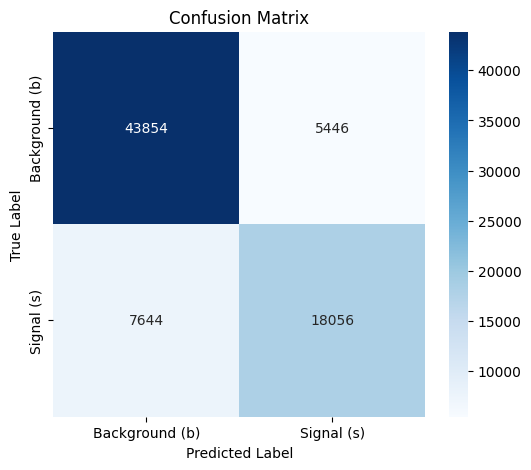

Classification Report:

                precision    recall  f1-score   support

Background (b)       0.85      0.89      0.87     49300
    Signal (s)       0.77      0.70      0.73     25700

      accuracy                           0.83     75000
     macro avg       0.81      0.80      0.80     75000
  weighted avg       0.82      0.83      0.82     75000



In [81]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Background (b)', 'Signal (s)']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

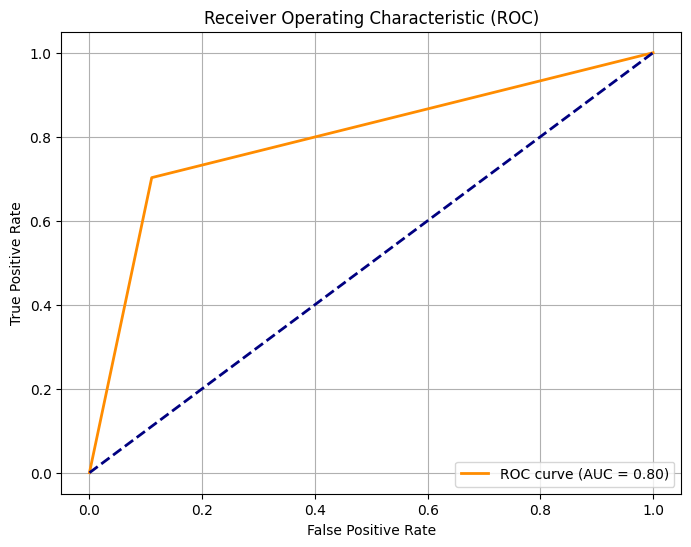

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# RandomForest Classifier performed little better .

# let's now try Multilayer perceptrons

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam

In [30]:
X_train.shape

(175000, 20)

In [31]:
dl_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history_dl_model = dl_model.fit(X_train, y_train, epochs=30, batch_size=256, validation_split=0.2,verbose=1)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7963 - loss: 0.4348 - val_accuracy: 0.8277 - val_loss: 0.3847
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8281 - loss: 0.3788 - val_accuracy: 0.8312 - val_loss: 0.3727
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8311 - loss: 0.3752 - val_accuracy: 0.8292 - val_loss: 0.3717
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8310 - loss: 0.3722 - val_accuracy: 0.8335 - val_loss: 0.3707
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8331 - loss: 0.3693 - val_accuracy: 0.8325 - val_loss: 0.3686
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8329 - loss: 0.3691 - val_accuracy: 0.8337 - val_loss: 0.3672
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.3659 - val_accuracy: 0.8343 - val_loss: 0.3696
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8344 - loss: 0.3645 - val_accuracy: 0.

In [33]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))  # start at 0

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlim(0, len(acc) - 1)
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xlim(0, len(loss) - 1)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


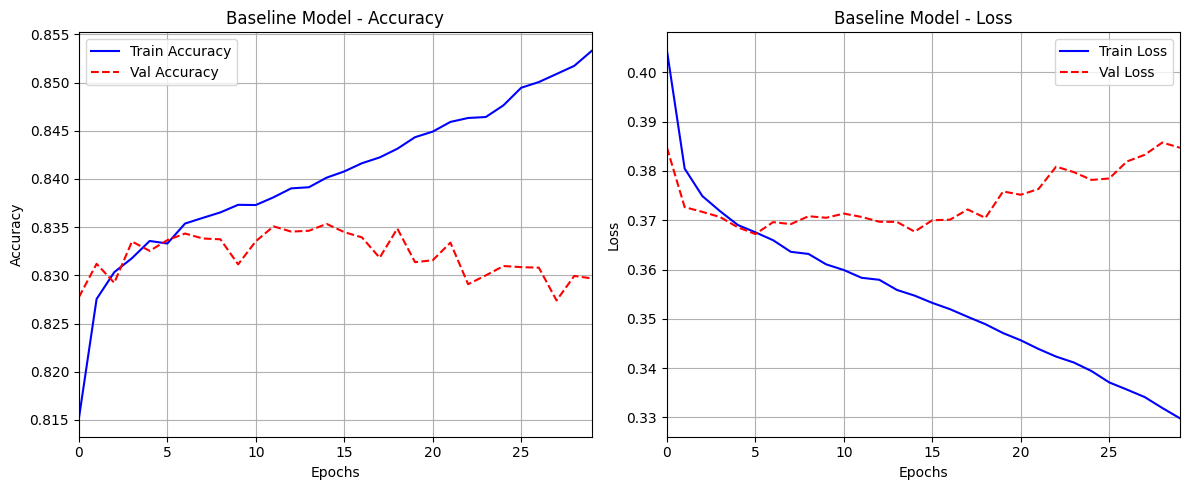

In [34]:
plot_learning_curves(history_dl_model, title='Baseline Model')

overfitting !

In [82]:
y_pred_prob = dl_model.predict(X_test)

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [84]:
y_pred_prob = (model.predict(X_test) > 0.5).astype("int32")

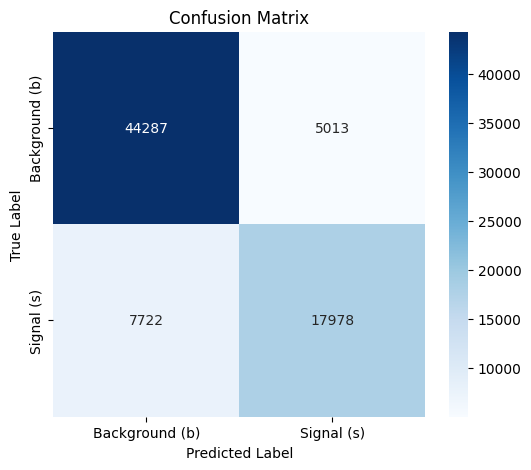

Classification Report:

                precision    recall  f1-score   support

Background (b)       0.85      0.89      0.87     49300
    Signal (s)       0.77      0.70      0.73     25700

      accuracy                           0.83     75000
     macro avg       0.81      0.80      0.80     75000
  weighted avg       0.82      0.83      0.82     75000



In [85]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_prob)
labels = ['Background (b)', 'Signal (s)']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))

In [37]:
from sklearn.metrics import roc_curve, auc

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

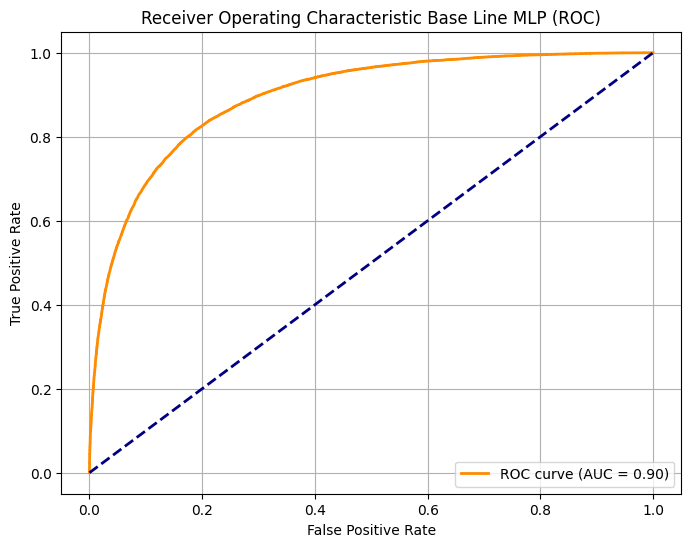

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Base Line MLP (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [40]:
loss1, acc1 = dl_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8260 - loss: 0.3905
Test accuracy : 82.70%
Test loss     : 38.70%


In [41]:
from tensorflow.keras import models, layers

In [42]:
 model_2 = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),

        layers.Dense(1024),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),

        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),

        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])

In [43]:
model_2.compile(optimizer=Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])



In [44]:
model_2_history = model_2.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=20,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7854 - loss: 0.4549 - val_accuracy: 0.8243 - val_loss: 0.3846
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8173 - loss: 0.4039 - val_accuracy: 0.8255 - val_loss: 0.3812
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8211 - loss: 0.3990 - val_accuracy: 0.8282 - val_loss: 0.3769
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8208 - loss: 0.3960 - val_accuracy: 0.8298 - val_loss: 0.3758
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8208 - loss: 0.3967 - val_accuracy: 0.8321 - val_loss: 0.3733
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8221 - loss: 0.3949 - val_accuracy: 0.8297 - val_loss: 0.3723
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8225 - loss: 0.3928 - val_accuracy: 0.8315 - val_loss: 0.3707
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8257 - loss: 0.3887 - val_accuracy: 

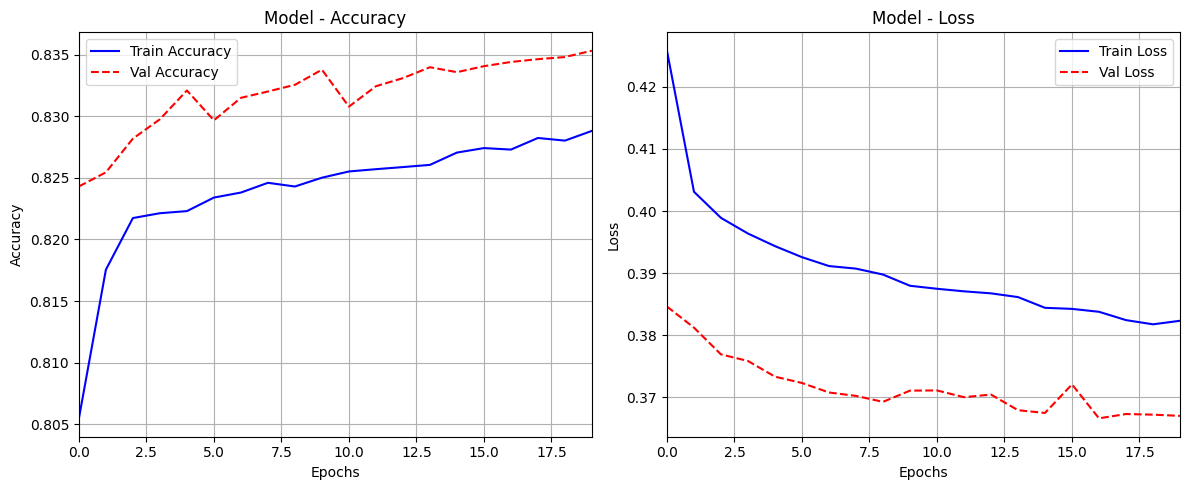

In [45]:
plot_learning_curves(model_2_history, title='Model')

In [46]:
loss1, acc1 = model_2.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8319 - loss: 0.3741
Test accuracy : 83.30%
Test loss     : 37.12%


In [86]:
y_pred_prob = model_2.predict(X_test)

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [87]:
y_pred_prob = (model.predict(X_test) > 0.5).astype("int32")

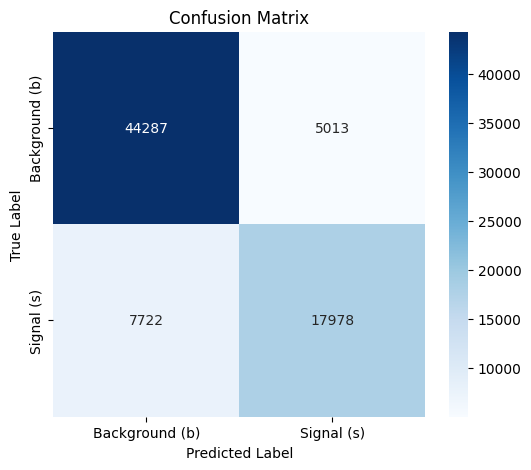

Classification Report:

                precision    recall  f1-score   support

Background (b)       0.85      0.89      0.87     49300
    Signal (s)       0.77      0.70      0.73     25700

      accuracy                           0.83     75000
     macro avg       0.81      0.80      0.80     75000
  weighted avg       0.82      0.83      0.82     75000



In [88]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_prob)
labels = ['Background (b)', 'Signal (s)']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

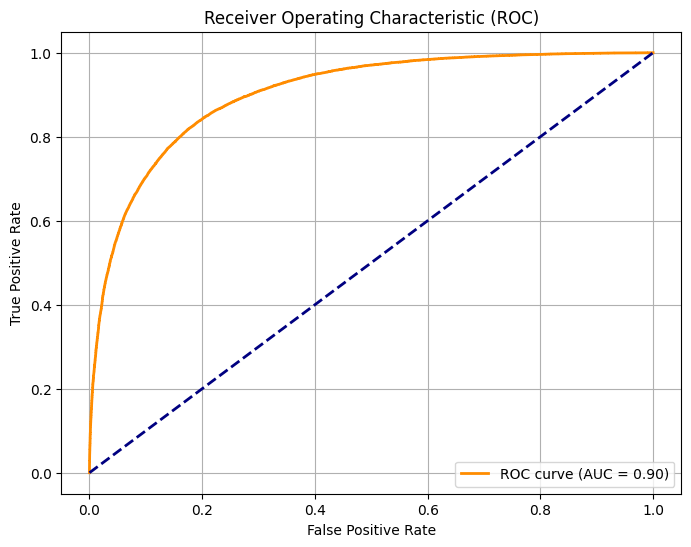

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

What helped mitigate overfitting?

Ans: Batch Normalisation and Dropout really helped with overfitting.


Let's see how Different optimizers work

In [50]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

In [51]:
 model_3 = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),

        layers.Dense(1024),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),

        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),

        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])

In [52]:
model_3.compile(optimizer= RMSprop(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])



In [53]:
model_3_history = model_2.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=10,
                                      batch_size=256,
                                      verbose=1)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8304 - loss: 0.3810 - val_accuracy: 0.8338 - val_loss: 0.3663
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8287 - loss: 0.3818 - val_accuracy: 0.8333 - val_loss: 0.3665
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8296 - loss: 0.3805 - val_accuracy: 0.8347 - val_loss: 0.3647
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8272 - loss: 0.3842 - val_accuracy: 0.8338 - val_loss: 0.3663
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8287 - loss: 0.3812 - val_accuracy: 0.8349 - val_loss: 0.3656
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8287 - loss: 0.3795 - val_accuracy: 0.8359 - val_loss: 0.3635
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8291 - loss: 0.3784 - val_accuracy: 0.8358 - val_loss: 0.3633
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8288 - loss: 0.3802 - val_accuracy: 0.

Not much difference diring 10 epochs in validation accuracy

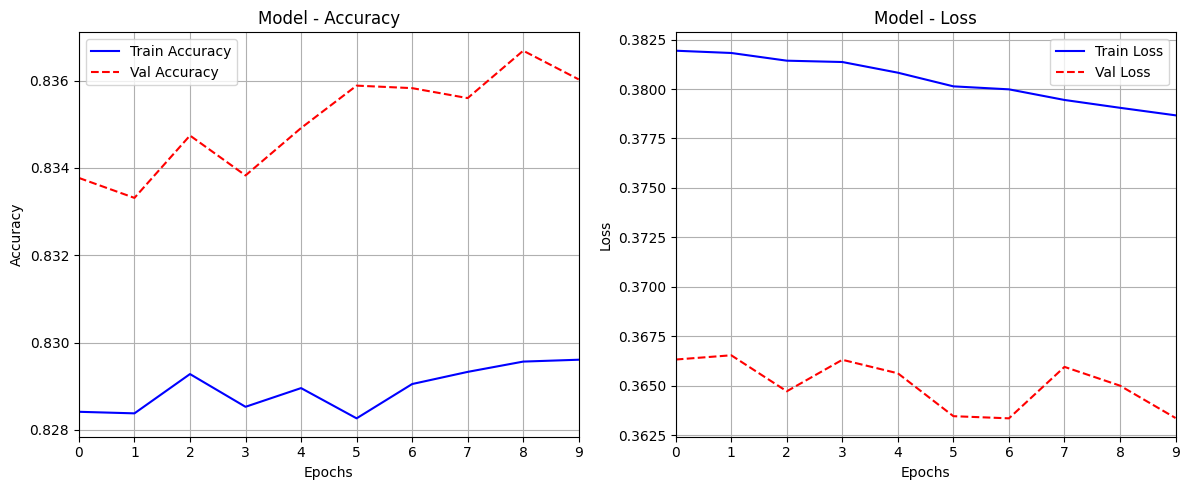

In [54]:
plot_learning_curves(model_3_history, title='Model')

In [55]:
loss1, acc1 =model_3.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6475 - loss: 0.6815
Test accuracy : 64.45%
Test loss     : 68.17%


In [89]:
y_pred = model_3.predict(X_test)

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [90]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

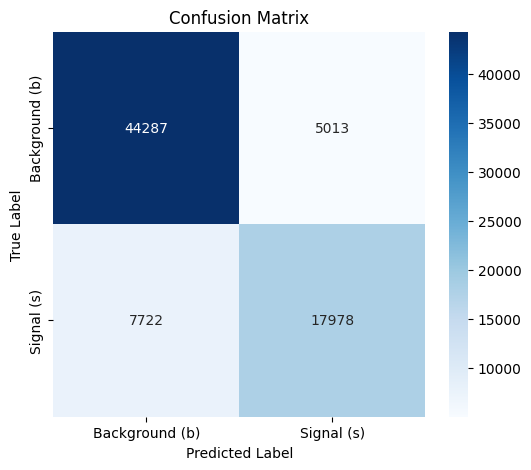

Classification Report:

                precision    recall  f1-score   support

Background (b)       0.85      0.90      0.87     49300
    Signal (s)       0.78      0.70      0.74     25700

      accuracy                           0.83     75000
     macro avg       0.82      0.80      0.81     75000
  weighted avg       0.83      0.83      0.83     75000



In [91]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Background (b)', 'Signal (s)']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

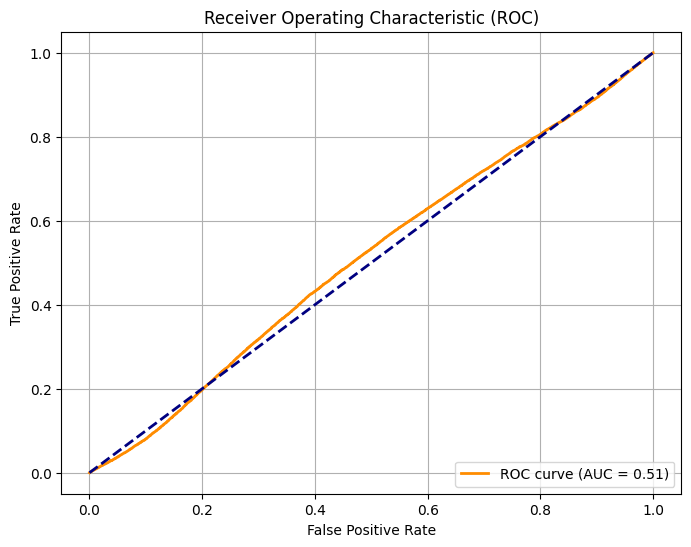

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

definitely not a good classifier.

Q :How did the learning rate and optimizer affect convergence?

Ans: convergence with RMSprop did not went well .

Let's Set callbacks

In [56]:
 model_4 = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),

        layers.Dense(1024),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),

        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),

        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])

In [57]:
model_4.compile(optimizer= Adam(learning_rate=0.1),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])



Changing Learning rate and Defining callbacks

In [58]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_classifier.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

In [59]:
model_4_history = model_4.fit(X_train, y_train,
                                      validation_split=0.2,
                                      epochs=10,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      batch_size=256,
                                      verbose=1)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7738 - loss: 0.4809
Epoch 1: val_loss improved from inf to 0.43091, saving model to best_classifier.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7739 - loss: 0.4808 - val_accuracy: 0.8210 - val_loss: 0.4309 - learning_rate: 0.1000
Epoch 2/10
541/547 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8074 - loss: 0.4233
Epoch 2: val_loss improved from 0.43091 to 0.38707, saving model to best_classifier.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8075 - loss: 0.4232 - val_accuracy: 0.8247 - val_loss: 0.3871 - learning_rate: 0.1000
Epoch 3/10
544/547 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8150 - loss: 0.4124
Epoch 3: val_loss did not improve from 0.38707
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8150 - loss: 0.4124 - val_accuracy: 0.8263 - val_loss: 0.3998 - learning_rate: 0.1000
Epoch 4/10
540/547 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8181 - loss: 0.4111
Epoch 

In [60]:
loss1, acc1 =model_4.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8318 - loss: 0.3783
Test accuracy : 83.21%
Test loss     : 37.52%


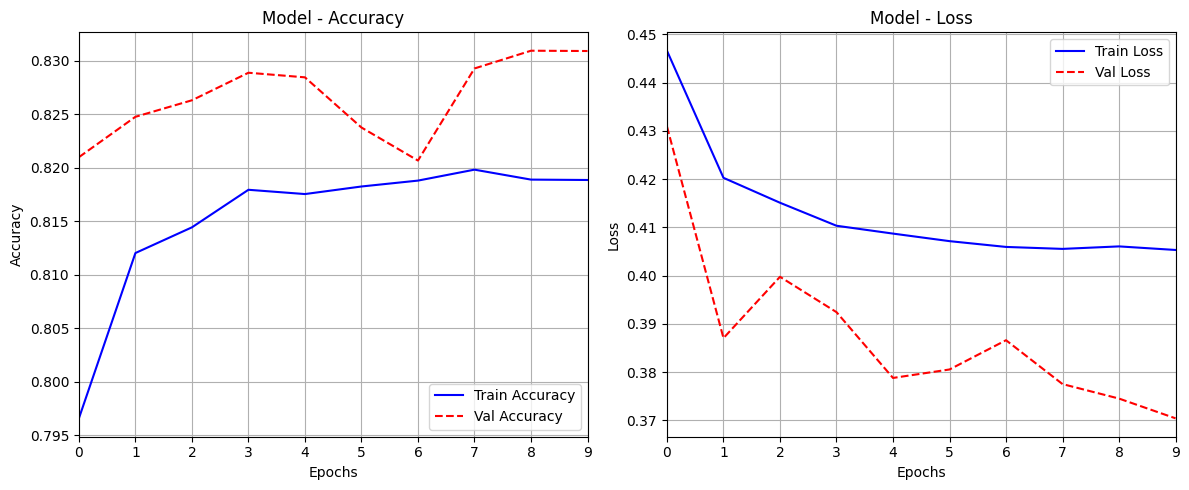

In [61]:
plot_learning_curves(model_4_history, title='Model')

In [62]:
from sklearn.metrics import roc_curve, auc

In [92]:
y_pred_prob = model_4.predict(X_test)

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [93]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

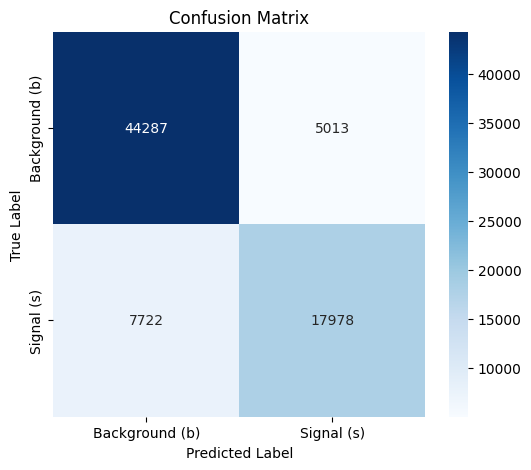

Classification Report:

                precision    recall  f1-score   support

Background (b)       0.85      0.90      0.87     49300
    Signal (s)       0.78      0.70      0.74     25700

      accuracy                           0.83     75000
     macro avg       0.82      0.80      0.81     75000
  weighted avg       0.83      0.83      0.83     75000



In [94]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Background (b)', 'Signal (s)']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print precision, recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

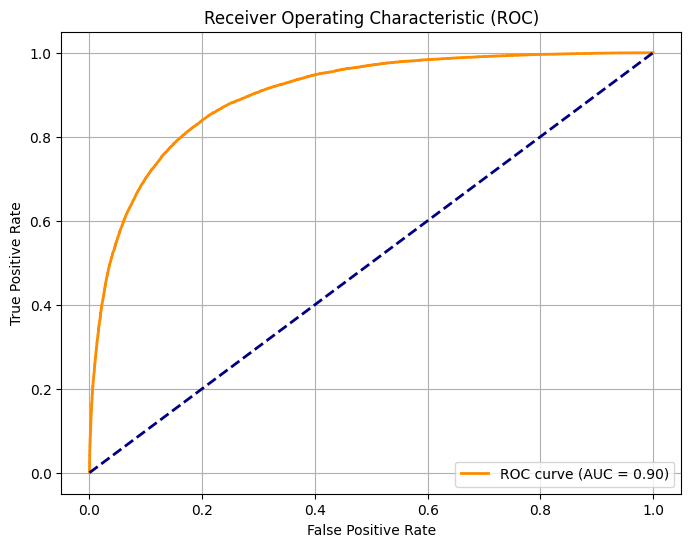

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()